In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime    # To access datetime  
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hackth/farm_data-1646897931981.csv
/kaggle/input/hackth/test_weather-1646897984996-1664552604982.csv
/kaggle/input/hackth/train_data.csv
/kaggle/input/hackth/train_weather-1646897968670.csv
/kaggle/input/hackth/test_data-1664552867678.csv


In [2]:
#importing the training data
train_weather = pd.read_csv("/kaggle/input/hackth/train_weather-1646897968670.csv")
farm_data = pd.read_csv("/kaggle/input/hackth/farm_data-1646897931981.csv")
train_data = pd.read_csv("/kaggle/input/hackth/train_data.csv")

In [3]:
# Reading the test data files
test_weather = pd.read_csv('/kaggle/input/hackth/test_weather-1646897984996-1664552604982.csv')
test_data = pd.read_csv('/kaggle/input/hackth/test_data-1664552867678.csv')

In [6]:
# Use the duplicated() and sum() functions to count the number of duplicates
train_duplicates = train_data.duplicated().sum()
test_duplicates = test_data.duplicated().sum()
train_weather_duplicates = train_weather.duplicated().sum()
test_weather_duplicates = test_weather.duplicated().sum()
farm_data_duplicates = farm_data.duplicated().sum()

In [8]:
print("duplicates in train data", train_duplicates)
print("duplicates in test data", test_duplicates)
print("duplicates in train weather data", train_weather_duplicates)
print("duplicates in test weather data", test_weather_duplicates)
print("duplicates in farm data", farm_data_duplicates)

duplicates in train data 117
duplicates in test data 0
duplicates in train weather data 0
duplicates in test weather data 0
duplicates in farm data 0


In [9]:
# checking the train weather data
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [10]:
# checking the test weather data
test_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6


In [11]:
# checking the train data
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [12]:
# checking the test data
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0
1,2017-01-01 00:00:00,fid_90053,ing_w,1
2,2017-01-01 00:00:00,fid_17537,ing_w,2
3,2017-01-01 00:00:00,fid_110392,ing_w,3
4,2017-01-01 00:00:00,fid_62402,ing_w,4


In [13]:
# checking the farm data
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


## Identification of Varibales and Datatypes

In [14]:
# checking the train data types
train_data.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

* The data contains 2 object features such as 'date', 'farm_id', 'ingredient_type' and 1 category feature such as ingredient type which we will be converting to numerical feature using one-hot-encoding 
* The data consist 1 numerical continuous features is 'yield'

In [15]:
# checking the test data types
test_data.dtypes

date               object
farm_id            object
ingredient_type    object
id                  int64
dtype: object

In [16]:
# checking the train weather data types
train_weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

* The data contains 1 object feature i.e timestamp and 1 categorical feature such as 'deidentified_location' which we will be converting to numerical feature using one-hot-encoding.
* The data consist 7 numerical continuous features such as 'temp_obs', 'cloudiness', 'wind direction', 'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed'

In [17]:
# checking the test weather data types
test_weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [18]:
# checking the farm data types
farm_data.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

* The data contains 1 object feature i.e farm_id and 2 categorical features such as 'deidentified_location', 'farming company' which we will be converting to numerical feature using one-hot-encoding.
* The data consist 2 numerical discrete features such as 'num_processing_plants', 'num_processing_plants'
* The data consist 1 numerical continuous feature such as 'farm_area'

## Dimensions of the Data

In [19]:
# Gives the number of rows and columns in the dataframe.
print("train_weather shape",train_weather.shape)
print("farm_data shape",farm_data.shape)
print("train_data shape",train_data.shape)

train_weather shape (139773, 9)
farm_data shape (1449, 6)
train_data shape (20216100, 4)


In [20]:
# Gives the number of rows and columns in the dataframe.
print("test_weather shape",test_weather.shape)
print("test_data shape",test_data.shape)

test_weather shape (138825, 9)
test_data shape (20848800, 4)


In [21]:
# checking the descriptive statistics of train_data
train_data.describe().round(2)

,yield
count,20216100.00
mean,2117.12
std,153235.62
min,0.00
25%,18.30
50%,78.78
75%,267.98
max,21904700.00


In [22]:
# checking the descriptive statistics of farm data
farm_data.describe().round(2)

,operations_commencing_year,num_processing_plants,farm_area
count,675.00,355.00,1449.00
mean,1967.96,7.74,8557.46
std,31.05,3.33,10290.86
min,1900.00,5.00,26.29
25%,1949.00,5.00,2137.88
50%,1970.00,7.00,5357.99
75%,1995.00,9.00,10746.65
max,2017.00,30.00,81290.12


In [23]:
# checking the descriptive statistics of train weather data
train_weather.describe().round(2)

,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139718.00,70600.00,133505.00,139660.00,129155.00,89484.00,139469.00
mean,14.42,2.15,180.53,7.35,1016.16,0.98,3.56
std,10.63,2.60,111.52,9.79,7.63,8.46,2.34
min,-28.90,0.00,0.00,-35.00,968.20,-1.00,0.00
25%,7.20,0.00,80.00,0.60,1011.80,0.00,2.10
50%,15.00,2.00,190.00,8.30,1016.40,0.00,3.10
75%,22.20,4.00,280.00,14.40,1020.80,0.00,5.00
max,47.20,9.00,360.00,26.10,1045.50,343.00,19.00


## unique values in each dataset

In [24]:
# train data unique value count
train_data.nunique()

date                  8784
farm_id               1434
ingredient_type          4
yield              1688175
dtype: int64

In [25]:
# test data unique value count analysis.
test_data.nunique()

date                   8760
farm_id                1434
ingredient_type           4
id                 20848800
dtype: int64

In [26]:
# farm data unique value count analysis
farm_data.nunique()

farm_id                       1434
operations_commencing_year     116
num_processing_plants           18
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

In [27]:
# train weather data unique count Analysis
train_weather.nunique()

timestamp                8784
deidentified_location      16
temp_obs                  619
cloudiness                 10
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [28]:
# test weather data unique value count analysis.
test_weather.nunique()

timestamp                8760
deidentified_location      16
temp_obs                  612
cloudiness                 10
wind_direction             53
dew_temp                  528
pressure_sea_level        713
precipitation             144
wind_speed                 70
dtype: int64

In [29]:
#Unique value count of the each column in train dataset
for i in (train_data.columns):
    print(train_data[i].value_counts())
    print("____________________________________________")

2016-12-27 22:00:00    2370
2016-12-27 19:00:00    2369
2016-12-27 20:00:00    2369
2016-12-27 17:00:00    2369
2016-12-27 21:00:00    2369
                       ... 
2016-02-26 01:00:00    1887
2016-02-23 09:00:00    1871
2016-03-23 16:00:00    1822
2016-03-13 03:00:00    1767
2016-03-13 02:00:00    1557
Name: date, Length: 8784, dtype: int64
____________________________________________
fid_63700     51227
fid_68761     41733
fid_103446    35136
fid_109814    35136
fid_122174    35135
              ...  
fid_60652      2657
fid_118770     2327
fid_73322      1685
fid_20058      1012
fid_19864       479
Name: farm_id, Length: 1434, dtype: int64
____________________________________________
ing_w    12060910
ing_x     4182440
ing_y     2708713
ing_z     1264037
Name: ingredient_type, dtype: int64
____________________________________________
0.0000      1873976
20.0000       23363
2.9307        23181
36.6000       22154
8.7921        21787
             ...   
27.8031           1
58.9751 

In [30]:
#Unique value count of the each column in test dataset
for i in (test_data.columns):
    print(test_data[i].value_counts())
    print("____________________________________________")

2017-01-01 00:00:00    2380
2017-09-01 10:00:00    2380
2017-09-01 04:00:00    2380
2017-09-01 05:00:00    2380
2017-09-01 06:00:00    2380
                       ... 
2017-05-02 10:00:00    2380
2017-05-02 09:00:00    2380
2017-05-02 08:00:00    2380
2017-05-02 07:00:00    2380
2017-12-31 23:00:00    2380
Name: date, Length: 8760, dtype: int64
____________________________________________
fid_63700     52560
fid_68761     43800
fid_81195     35040
fid_70655     35040
fid_75385     35040
              ...  
fid_20681      8760
fid_73716      8760
fid_79063      8760
fid_113611     8760
fid_34139      8760
Name: farm_id, Length: 1434, dtype: int64
____________________________________________
ing_w    12377880
ing_x     4362480
ing_y     2838240
ing_z     1270200
Name: ingredient_type, dtype: int64
____________________________________________
0           1
27246199    1
27246206    1
27246205    1
27246204    1
           ..
13548614    1
13548613    1
13548612    1
13548611    1
41696849

In [31]:
#Unique value count of the each column in train_weather dataset
for i in (train_weather.columns):
    print(train_weather[i].value_counts())
    print("____________________________________________")

2016-07-02 00:00:00    16
2016-08-30 12:00:00    16
2016-08-31 03:00:00    16
2016-08-31 02:00:00    16
2016-08-31 01:00:00    16
                       ..
2016-02-15 20:00:00    11
2016-04-07 15:00:00    11
2016-03-23 00:00:00    10
2016-03-23 01:00:00    10
2016-01-01 00:00:00     9
Name: timestamp, Length: 8784, dtype: int64
____________________________________________
location 7369    8784
location 5677    8784
location 5489    8783
location 5833    8783
location 2532    8783
location 565     8782
location 1784    8782
location 5290    8780
location 8421    8780
location 5410    8777
location 959     8763
location 6364    8755
location 7048    8755
location 4525    8614
location 868     8614
location 5150    8454
Name: deidentified_location, dtype: int64
____________________________________________
 15.0    2722
 24.4    2200
 20.0    2191
 10.0    2187
 25.0    2185
         ... 
-20.4       2
-20.9       2
 32.6       1
-28.3       1
-28.9       1
Name: temp_obs, Length: 619, dty

In [32]:
#Unique value count of the each column in train_weather dataset
for i in (test_weather.columns):
    print(test_weather[i].value_counts())
    print("____________________________________________")

2017-07-02 12:00:00    16
2017-08-21 06:00:00    16
2017-08-22 12:00:00    16
2017-08-22 11:00:00    16
2017-08-22 10:00:00    16
                       ..
2017-08-15 19:00:00    11
2017-08-15 20:00:00    11
2017-01-18 19:00:00    11
2017-09-18 17:00:00    11
2017-01-01 00:00:00     9
Name: timestamp, Length: 8760, dtype: int64
____________________________________________
location 7369    8760
location 5489    8760
location 5677    8760
location 5290    8759
location 5833    8759
location 2532    8759
location 5410    8759
location 565     8757
location 959     8753
location 7048    8750
location 8421    8749
location 6364    8745
location 1784    8743
location 5150    8520
location 4525    8246
location 868     8246
Name: deidentified_location, dtype: int64
____________________________________________
15.0    2823
23.3    2456
10.0    2382
23.9    2317
22.8    2316
        ... 
33.8       1
32.7       1
33.2       1
39.0       1
37.0       1
Name: temp_obs, Length: 612, dtype: int64
_

In [33]:
#Unique value count of the each column in farm_data dataset
for i in (farm_data.columns):
    print(farm_data[i].value_counts())
    print("____________________________________________")

fid_29387    2
fid_68792    2
fid_73431    2
fid_40459    2
fid_59158    2
            ..
fid_84714    1
fid_71572    1
fid_36519    1
fid_80473    1
fid_34139    1
Name: farm_id, Length: 1434, dtype: int64
____________________________________________
1976.0    55
1966.0    23
1968.0    18
1919.0    17
1964.0    15
          ..
1926.0     1
1916.0     1
1922.0     1
2017.0     1
1937.0     1
Name: operations_commencing_year, Length: 116, dtype: int64
____________________________________________
5.0     109
6.0      67
8.0      37
7.0      33
9.0      25
10.0     25
12.0     19
11.0     14
13.0      8
15.0      5
14.0      4
16.0      2
17.0      2
20.0      1
18.0      1
25.0      1
30.0      1
23.0      1
Name: num_processing_plants, dtype: int64
____________________________________________
36012.733114    7
2043.866000     4
4935.936390     4
2272.035768     4
371.612000      3
               ..
1144.193348     1
425.588643      1
982.727934      1
5681.111353     1
8572.252713     1

## Exploratory Data Analysis

## missing values in each dataset

Train Data -

In [34]:
# checking misiing value count for train data
train_data.isna().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

This is a clean dataset so there are no missing values.
Missing values can be addressed by :-
- Dropping the feature or observation if it contains too much missing values.
- imputing the missing values.

In [35]:
# checking misiing value count for test data
test_data.isna().sum()

date               0
farm_id            0
ingredient_type    0
id                 0
dtype: int64

Weather Data

In [36]:
# checking misiing value count for train weather data
train_weather.isna().mean().round(4) * 100

timestamp                 0.00
deidentified_location     0.00
temp_obs                  0.04
cloudiness               49.49
wind_direction            4.48
dew_temp                  0.08
pressure_sea_level        7.60
precipitation            35.98
wind_speed                0.22
dtype: float64

In [37]:
# checking misiing value count for test weather data
test_weather.isna().mean().round(4) * 100

timestamp                 0.00
deidentified_location     0.00
temp_obs                  0.03
cloudiness               49.75
wind_direction            4.42
dew_temp                  0.13
pressure_sea_level        7.84
precipitation            34.42
wind_speed                0.17
dtype: float64

Farm Data -

In [38]:
# checking misiing value count for farm data
farm_data.isna().mean().round(4)  * 100

farm_id                        0.00
operations_commencing_year    53.42
num_processing_plants         75.50
farm_area                      0.00
farming_company                0.00
deidentified_location          0.00
dtype: float64

### Data Cleaning and Preprocessing -

Train data

In [39]:
# Convert date Object to datetime format in train data
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')

In [40]:
# Convert date Object to datetime format in test data
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')

Farm Data - 

The founding year of the farm can give an indication of the age of the infrastructure, which may affect the efficiency and effectiveness of the farm's operations. For example, an older farm may have outdated equipment or technology that could impact crop yield.

In [41]:
import datetime
current_year = datetime.datetime.now().year
def classify_founding_year(year):
    age = current_year - year
    if age >= 50:
        return 'old'
    elif age < 50 and age >= 20:
        return 'moderate'
    else:
        return 'new'
    
# Example usage
farm_data['operations_commencing_year'] = farm_data['operations_commencing_year'].apply(classify_founding_year)


In [42]:
#Fill missing values with median in train weather dataset
farm_data['num_processing_plants'].fillna(farm_data['num_processing_plants'].median(), inplace=True)
train_weather['temp_obs'].fillna(train_weather['temp_obs'].median(), inplace = True)
train_weather['wind_direction'].fillna(train_weather['wind_direction'].median(), inplace = True)
train_weather['dew_temp'].fillna(train_weather['dew_temp'].median(), inplace = True)
train_weather['pressure_sea_level'].fillna(train_weather['pressure_sea_level'].median(), inplace = True)
train_weather['precipitation'].fillna(train_weather['precipitation'].median(), inplace = True)
train_weather['wind_speed'].fillna(train_weather['wind_speed'].median(), inplace = True)
train_weather['cloudiness'].fillna(train_weather['cloudiness'].median(), inplace = True)

In [43]:
# Fill missing values with median in test weather dataset
test_weather['temp_obs'].fillna(test_weather['temp_obs'].median(), inplace = True)
test_weather['wind_direction'].fillna(test_weather['wind_direction'].median(), inplace = True)
test_weather['dew_temp'].fillna(test_weather['dew_temp'].median(), inplace = True)
test_weather['pressure_sea_level'].fillna(test_weather['pressure_sea_level'].median(), inplace = True)
test_weather['precipitation'].fillna(test_weather['precipitation'].median(), inplace = True)
test_weather['wind_speed'].fillna(test_weather['wind_speed'].median(), inplace = True)
test_weather['cloudiness'].fillna(test_weather['cloudiness'].median(), inplace = True)

* num processing plants is in float but it should be in integer right so let's convert it

In [44]:
#Type Conversion
farm_data['num_processing_plants'] = farm_data['num_processing_plants'].astype('int64')

Weather Data -

In [45]:
# Convert date Object to datetime format in train weather data
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [46]:
# Convert date Object to datetime format in test weather data
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

<div class="alert alert-block alert-info"><b> 
 i have done all the viaulizations in tableu that's why i didn't included any plots here
</b></div> 

### Merging the Datasets

In [47]:
# Merging train_data and farm_data on 'farm_id' column
train_data_merged = pd.merge(train_data,farm_data, on = 'farm_id')

In [48]:
# Merging test_data and farm_data on 'farm_id' column
test_data_merged = pd.merge(test_data,farm_data, on = 'farm_id')

In [49]:
# checking the train merged data
train_data_merged.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369


In [50]:
# checking the test merged data
test_data_merged.head()

,date,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,new,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,new,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,new,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,new,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,new,7,690.455096,Obery Farms,location 7369


in weather data the date column named as timestamp so we should rename that as date or we should rename merged data as timestamp.
so let's rename merged data as timestamp

In [51]:
# Renaming date column as timestamp
train_data_merged.rename(columns = {'date':'timestamp'},inplace = True)
test_data_merged.rename(columns = {'date':'timestamp'},inplace = True)

In [52]:
# checking the shape of the train merged dataset
train_data_merged.shape

(20602899, 9)

In [53]:
# checking the shape of the test merged dataset
test_data_merged.shape

(21251760, 9)

In [54]:
# checking the test merged data
test_data_merged.head()

,timestamp,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,new,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,new,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,new,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,new,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,new,7,690.455096,Obery Farms,location 7369


In [55]:
# checking the null values in train merged dataset
train_data_merged.isnull().sum()

timestamp                     0
farm_id                       0
ingredient_type               0
yield                         0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
dtype: int64

In [56]:
# checking the null values in test merged dataset
test_data_merged.isnull().sum()

timestamp                     0
farm_id                       0
ingredient_type               0
id                            0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
dtype: int64

In [57]:
# checking the unique value count in train merged dataset
train_data_merged.nunique()

timestamp                        8784
farm_id                          1434
ingredient_type                     4
yield                         1688175
operations_commencing_year          3
num_processing_plants              18
farm_area                        1397
farming_company                    16
deidentified_location              16
dtype: int64

In [58]:
# checking the what portion of different ingredient types are there in train merged dataset
train_data_merged.ingredient_type.value_counts(normalize = True)*100

ing_w    59.769370
ing_x    20.659355
ing_y    13.308253
ing_z     6.263022
Name: ingredient_type, dtype: float64

In [59]:
# checking the what portion of different farming companies are there in train merged dataset
train_data_merged.farming_company.value_counts(normalize = True)*100

Obery Farms                            40.450240
Wayne Farms                            21.702417
Sanderson Farms                        11.029530
Dole Food Company                      10.588427
Del Monte Foods                         8.382582
Foster Farms                            2.062030
Other                                   1.175670
Freight Farms                           1.037699
Monogram Foods                          0.610171
Perdue Farms                            0.553757
Tyson Foods                             0.546802
Mountaire Farms                         0.542938
Northland Organic Foods Corporation     0.468473
West Liberty Foods                      0.376777
Kansas Ville Farms                      0.272792
Southern Confederate Farms              0.199695
Name: farming_company, dtype: float64

In [60]:
# checking the train weather
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
1,2016-01-01 01:00:00,location 7369,24.4,2.0,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [61]:
# checking the train weather data types
train_weather.dtypes

timestamp                datetime64[ns]
deidentified_location            object
temp_obs                        float64
cloudiness                      float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
dtype: object

In [62]:
# checking the train weather shape
train_weather.shape

(139773, 9)

In [63]:
# checking the train merged data shape
train_data_merged.shape

(20602899, 9)

In [64]:
# final train merged dataset  here we are doing inner join
train_final_merged = pd.merge(train_data_merged,train_weather,on = ['deidentified_location','timestamp'],how = 'inner')
train_final_merged.shape

(20511532, 16)

In [65]:
#final test merged dataset  here we are doing inner join
test_final_merged = pd.merge(test_data_merged,test_weather,on = ['deidentified_location','timestamp'],how = 'inner')
test_final_merged.shape

(21154797, 16)

In [66]:
# checking the unique values in final merged train dataset
train_final_merged.nunique()

timestamp                        8784
farm_id                          1434
ingredient_type                     4
yield                         1679625
operations_commencing_year          3
num_processing_plants              18
farm_area                        1397
farming_company                    16
deidentified_location              16
temp_obs                          619
cloudiness                         10
wind_direction                     43
dew_temp                          522
pressure_sea_level                709
precipitation                     128
wind_speed                         58
dtype: int64

In [67]:
# checking the null values in final merged train dataset
train_final_merged.isnull().sum()

timestamp                     0
farm_id                       0
ingredient_type               0
yield                         0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
temp_obs                      0
cloudiness                    0
wind_direction                0
dew_temp                      0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
dtype: int64

In [68]:
# checking the null values in final merged test dataset
test_final_merged.isnull().sum()

timestamp                     0
farm_id                       0
ingredient_type               0
id                            0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
temp_obs                      0
cloudiness                    0
wind_direction                0
dew_temp                      0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
dtype: int64

In [69]:
# checking the final merged test dataset
test_final_merged.head()

,timestamp,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01,fid_110884,ing_w,0,new,7,690.455096,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
1,2017-01-01,fid_90053,ing_w,1,new,7,252.696160,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
2,2017-01-01,fid_17537,ing_w,2,moderate,7,499.446528,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
3,2017-01-01,fid_110392,ing_w,3,moderate,7,2200.407555,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
4,2017-01-01,fid_62402,ing_w,4,moderate,7,10833.140121,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6


In [70]:
# checking the final merged train dataset
train_final_merged.head()

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
1,2016-01-01,fid_90053,ing_w,0.0,new,7,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
2,2016-01-01,fid_17537,ing_w,0.0,moderate,7,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
3,2016-01-01,fid_110392,ing_w,0.0,moderate,7,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
4,2016-01-01,fid_62402,ing_w,0.0,moderate,7,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0


In [71]:
# checking the  data types of final merged tarin dataset
train_final_merged.dtypes

timestamp                     datetime64[ns]
farm_id                               object
ingredient_type                       object
yield                                float64
operations_commencing_year            object
num_processing_plants                  int64
farm_area                            float64
farming_company                       object
deidentified_location                 object
temp_obs                             float64
cloudiness                           float64
wind_direction                       float64
dew_temp                             float64
pressure_sea_level                   float64
precipitation                        float64
wind_speed                           float64
dtype: object

In [72]:
# extracting the date/time components from timestamp using them to create new columns
train_final_merged['month'] = train_final_merged['timestamp'].dt.month     #Extract Month
train_final_merged['day'] = train_final_merged['timestamp'].dt.day  #Extract Day
train_final_merged['hour'] = train_final_merged['timestamp'].dt.hour #extract the hour
train_final_merged.drop(['timestamp'], axis=1, inplace=True)

The .dt accessor allows us to access the date/time components of the timestamp data. In this case, we are using the .month property of the dt accessor to extract the month value from each timestamp in the timestamp column.

In [73]:
# extracting the date/time components from timestamp using them to create new columns
test_final_merged['month'] = test_final_merged['timestamp'].dt.month     #Extract Month
test_final_merged['day'] = test_final_merged['timestamp'].dt.day  #Extract Day
test_final_merged['hour'] = test_final_merged['timestamp'].dt.hour #extract the hour
test_final_merged.drop(['timestamp'], axis=1, inplace=True)

In [74]:
# checking the final merged train data
train_final_merged.head()

,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,day,hour
0,fid_110884,ing_w,0.0,new,7,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,1,1,0
1,fid_90053,ing_w,0.0,new,7,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,1,1,0
2,fid_17537,ing_w,0.0,moderate,7,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,1,1,0
3,fid_110392,ing_w,0.0,moderate,7,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,1,1,0
4,fid_62402,ing_w,0.0,moderate,7,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,1,1,0


In [75]:
# checking the final merged test data
test_final_merged.head()

,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,day,hour
0,fid_110884,ing_w,0,new,7,690.455096,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,1,1,0
1,fid_90053,ing_w,1,new,7,252.696160,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,1,1,0
2,fid_17537,ing_w,2,moderate,7,499.446528,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,1,1,0
3,fid_110392,ing_w,3,moderate,7,2200.407555,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,1,1,0
4,fid_62402,ing_w,4,moderate,7,10833.140121,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,1,1,0


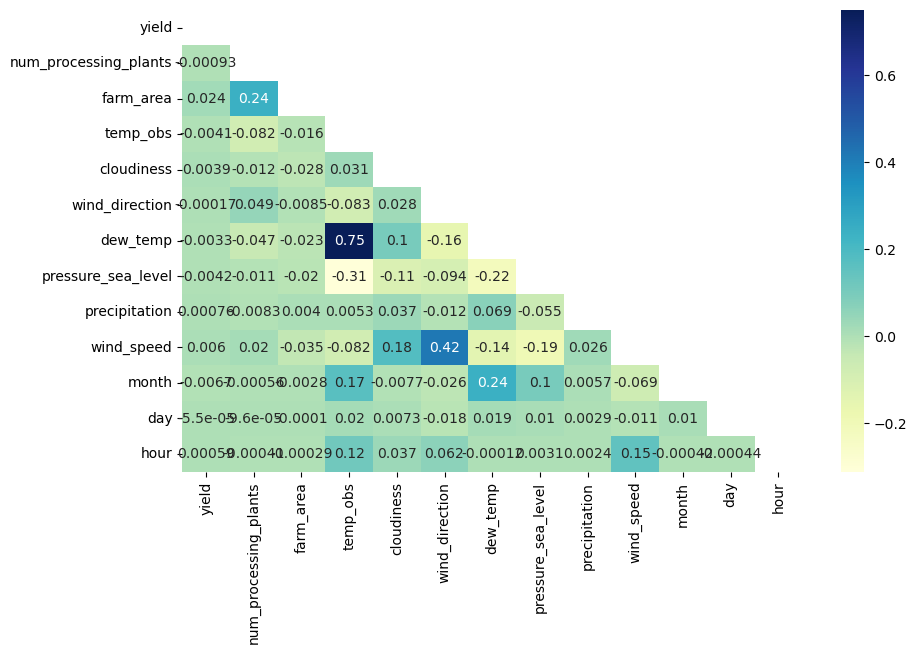

In [76]:
# creating mask
mask = np.triu(np.ones_like(train_final_merged.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(train_final_merged.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

1. None of the features are strongly correlated with the target variable (yield).

2. from the above heatmap we can clearly see that dew_temp column and temp_obs column are highly correlated so let's drop one column

In [77]:
# dropping the dew_temp column from final merged datasets
train_final_merged.drop(['dew_temp'], axis=1, inplace=True)
test_final_merged.drop(['dew_temp'], axis=1, inplace=True)

In [78]:
# checking the data types of train final merged
train_final_merged.dtypes

farm_id                        object
ingredient_type                object
yield                         float64
operations_commencing_year     object
num_processing_plants           int64
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float64
cloudiness                    float64
wind_direction                float64
pressure_sea_level            float64
precipitation                 float64
wind_speed                    float64
month                           int64
day                             int64
hour                            int64
dtype: object

In [79]:
# checking the data types of test final merged 
test_final_merged.dtypes

farm_id                        object
ingredient_type                object
id                              int64
operations_commencing_year     object
num_processing_plants           int64
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float64
cloudiness                    float64
wind_direction                float64
pressure_sea_level            float64
precipitation                 float64
wind_speed                    float64
month                           int64
day                             int64
hour                            int64
dtype: object

In [80]:
# checking the unique value count in train final merged dataset
train_final_merged.nunique()

farm_id                          1434
ingredient_type                     4
yield                         1679625
operations_commencing_year          3
num_processing_plants              18
farm_area                        1397
farming_company                    16
deidentified_location              16
temp_obs                          619
cloudiness                         10
wind_direction                     43
pressure_sea_level                709
precipitation                     128
wind_speed                         58
month                              12
day                                31
hour                               24
dtype: int64

In [81]:
# checking the value counts of loaction in train final merged dataset
train_final_merged.deidentified_location.value_counts()

location 2532    2790470
location 8421    2703006
location 5489    2580537
location 5410    2525792
location 5290    2439148
location 5150    1760872
location 7369    1085446
location 6364     819743
location 5833     799257
location 565      667989
location 5677     575401
location 959      552034
location 1784     411313
location 4525     359642
location 7048     323623
location 868      117259
Name: deidentified_location, dtype: int64

In [82]:
# checking the value counts of ingredient in train final merged dataset
train_final_merged.ingredient_type.value_counts()

ing_w    12269895
ing_x     4234056
ing_y     2719834
ing_z     1287747
Name: ingredient_type, dtype: int64

In [83]:
# descriptive stats of final dataset
train_final_merged.describe().round(2)

,yield,num_processing_plants,farm_area,temp_obs,cloudiness,wind_direction,pressure_sea_level,precipitation,wind_speed,month,day,hour
count,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00,20511532.00
mean,2093.07,7.21,9944.73,15.98,1.95,174.33,1016.10,0.65,3.38,6.58,15.77,11.51
std,152128.38,1.72,10856.29,10.94,1.81,110.19,6.85,6.75,2.27,3.44,8.82,6.92
min,0.00,5.00,26.29,-28.90,0.00,0.00,968.20,-1.00,0.00,1.00,1.00,0.00
25%,18.05,7.00,2992.03,8.60,0.00,80.00,1011.90,0.00,2.10,4.00,8.00,6.00
50%,77.68,7.00,6683.07,16.70,2.00,190.00,1016.40,0.00,3.10,7.00,16.00,12.00
75%,265.62,7.00,12802.59,23.90,2.00,270.00,1020.20,0.00,4.60,10.00,23.00,18.00
max,21904700.00,30.00,81290.12,47.20,9.00,360.00,1045.50,343.00,19.00,12.00,31.00,23.00


In [84]:
# check for null values in the train merged dataset
train_final_merged.isnull().sum()

farm_id                       0
ingredient_type               0
yield                         0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
temp_obs                      0
cloudiness                    0
wind_direction                0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
month                         0
day                           0
hour                          0
dtype: int64

In [85]:
# check for null values in the test merged dataset
test_final_merged.isnull().sum()

farm_id                       0
ingredient_type               0
id                            0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
farming_company               0
deidentified_location         0
temp_obs                      0
cloudiness                    0
wind_direction                0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
month                         0
day                           0
hour                          0
dtype: int64

In [86]:
# checking the value counts of processing plants in train final merged dataset
train_final_merged.num_processing_plants.value_counts()

7     17263246
5       949449
6       688799
8       377747
10      309503
9       261369
12      174678
11      139993
13       86306
15       60931
14       43593
17       43359
25       25833
23       25833
30       25811
16       17537
18        8782
20        8763
Name: num_processing_plants, dtype: int64

In [87]:
# checking the columns in train final merged dataset
train_final_merged.columns

Index(['farm_id', 'ingredient_type', 'yield', 'operations_commencing_year',
       'num_processing_plants', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'cloudiness', 'wind_direction',
       'pressure_sea_level', 'precipitation', 'wind_speed', 'month', 'day',
       'hour'],
      dtype='object')

In [88]:
train_final_merged.to_csv("train_final.csv")
test_final_merged.to_csv("test_final.csv")